# ObsID : 0945060133, SRCNUM : 5, Instru : EMOS2
Not on Simbad.

## ESASky
EPIC Stack's pointer is not on the source location from XMM-Archive link. The closest pointer are far from the source (https://sky.esa.int/esasky/?target=53.59479166666666%20-28.90244444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr).

``GAIA``

- Designation : Gaia DR3 5057101614813827200
- RA : 53.5942754°
- DEC : -28.9023933°
- Parallax : 2.941 mas
- G : 19.6951

``2MASS``

- Name : 03342264-2854082
- RA : 53.5943410°
- DEC : -28.9022880°

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945060133_SRCNUM5_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.949e-03 +/- 7.103e-04 (86.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-64
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.154e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945060133_SRCNUM5_EMOS2_background_spectrum.fits
  Background Exposure Time: 1.154e+04 sec
 Using Response (RMF) File            ObsID0945060133_SRCNUM5_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945060133_SRCNUM5_EMOS2.arf



In [4]:
n_cts = 4.949e-03*1.154e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 57.11146

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     2 channels (1-2) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 856.5, 660.5, -0.5)

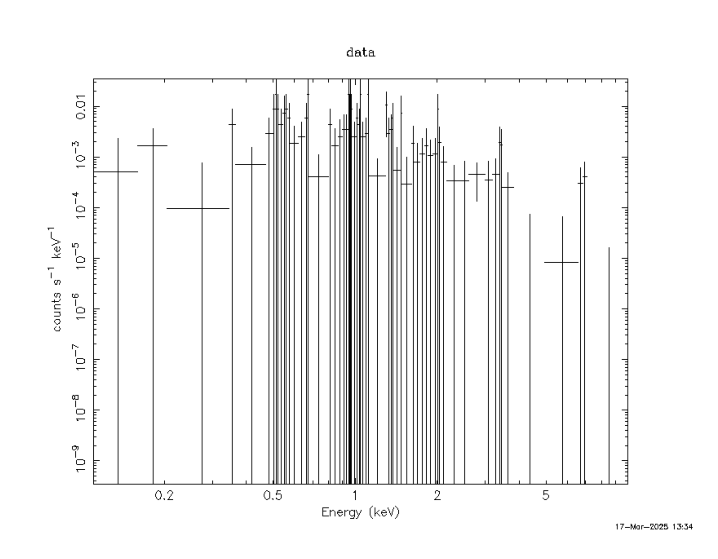

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              9.356541e+06     using 62 bins.

Te

(-0.5, 859.5, 659.5, -0.5)

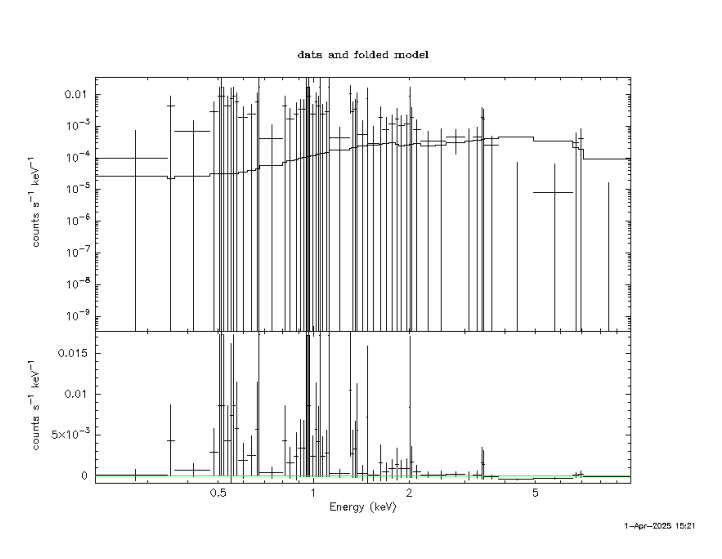

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model (Third best fit)

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.234579e+06     using 62 bins.

Test statistic : Chi-Squared              5.986739e+10     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
681507       413841       -3      0.420288       195.737      0.360894
335196       324100       -4      0.183923       46.4696     0.0997465
177547       564910       -5     0.0472018       21.6877     0.0379836


(-0.5, 857.5, 660.5, -0.5)

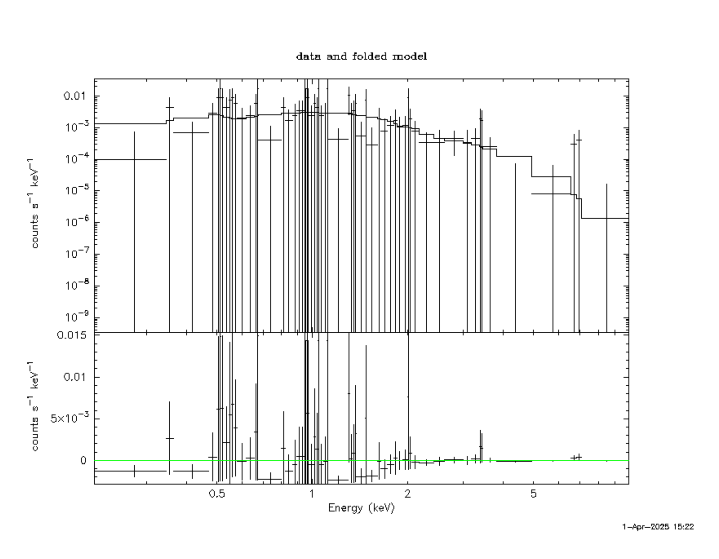

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model (Second best fit)

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                809699.4     using 62 bins.

Test statistic : Chi-Squared              6.817908e+09     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
301989       233645       -3      0.211869       45.7181     

(-0.5, 857.5, 657.5, -0.5)

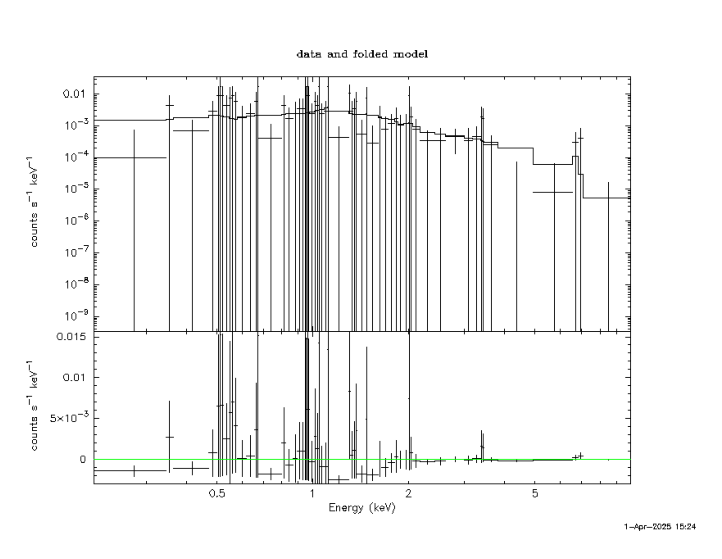

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              5.423922e+06     using 62 bins.

Test statistic : Chi-Squared              4.692450e+11     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
3.05421e+06  1.36891e+06  -3      0.322324       7.54338      0.499042
204.013      3.97383e+06  -4       21336.6       8.82691       22474.0
204.013      1.61706e-70  -5       10490.8       9.47645       2253.4

(-0.5, 851.5, 656.5, -0.5)

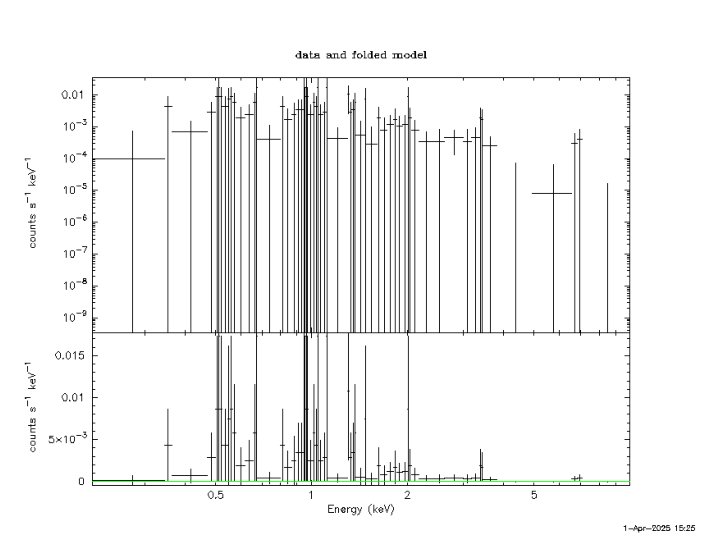

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model (Best fit)

In [19]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.620396e+06     using 62 bins.

Test statistic : Chi-Squared              2.727300e+10     using 62 bins.
 Null hypothesis probability

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.5942754°
- Dec = -28.9023933°

53.59 -28.90

**Column density :** nH = 3*10^20 cm^-2

In [20]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Third best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec (Second best fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"apec+apec (Best fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")

The different models give a column density of :

bbody
(tbabs) : 259159.74229665383

bremss (Third best fit)
(tbabs) : 3.5998680847117727e+20

apec (Second best fit)
(tbabs) : 5.878871986973413e+19

powerlaw
(tbabs) : 1.0490780982641922e+26

apec+apec (Best fit)
(tbabs) : 5.878871986973413e+19


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Apec + Apec`` with C-statistic = 55.1572 using 62 bins: **1.0455e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Apec`` with C-statistic = 59.3208 using 62 bins: **1.0467e-13 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Bremss`` with C-statistic = 60.2316 using 62 bins: **7.6145e-14 ergs/cm^2/s**.

In [5]:
Flux_apec = 1.0455e-13 # ergs/cm^2/s
Flux_bremss = 7.6145e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec : F_x-ray = {Flux_apec} ergs/cm^2/s")
print(f"Bremss : F_x-ray = {Flux_bremss} ergs/cm^2/s")

X-ray flux : 
Apec : F_x-ray = 1.0455e-13 ergs/cm^2/s
Bremss : F_x-ray = 7.6145e-14 ergs/cm^2/s


### Optical flux

In [3]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6951

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.390430542671063e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [6]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Apec : F_x-ray/F_optical = {Flux_bremss/F}")
print(f"Bremss : F_x-ray/F_optical = {Flux_apec/F}")

X-ray Flux / Optical Flux ratio : 
Apec : F_x-ray/F_optical = 0.5476361289771652
Bremss : F_x-ray/F_optical = 0.7519253698149926


## Luminosity

In [8]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_apec = 4*np.pi*Flux_apec*(d_cm)**2 # erg/s
Luminosity_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Apec : L_x-ray : {Luminosity_apec} erg/s")
print(f"Bremss : L_x-ray : {Luminosity_bremss} erg/s")

(GAIA)
Distance : d = 1.0492009520571234e+21 cm
Luminosity :
Apec : L_x-ray : 1.4462762455990242e+30 erg/s
Bremss : L_x-ray : 1.0533400738511497e+30 erg/s
